<a href="https://colab.research.google.com/github/AkatsukiDeki/Fortuna/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Установка библиотек**

In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go
from plotly.offline import iplot

device = "cpu"


## **Загрузка набора данных**

In [4]:
df = pd.read_csv("dataset.csv").iloc[:, :2]
df.columns = ["Date", "Temperature"]
df = df.set_index('Date')

df.index = pd.to_datetime(df.index)
if not df.index.is_monotonic_increasing:
    df = df.sort_index()

df

,Temperature
Date,
2008-01-12,-20
2008-01-13,-9
2008-01-14,-6
2008-01-15,-1
2008-01-17,-4
...,...
2023-09-26,21
2023-09-27,19
2023-09-28,18


## **Визуализация dataset**

In [5]:
def plot_dataset(df: pd.DataFrame, title: str) -> None:
    data = []

    value = go.Scatter(
        x=df.index,
        y=df.Temperature,
        mode="lines",
        name="values",
        marker=dict(),
        text=df.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    layout = dict(
        title=title,
        xaxis=dict(title="Date", ticklen=5, zeroline=False),
        yaxis=dict(title="Temperature", ticklen=5, zeroline=False),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)

plot_dataset(df, "Temperature change")


## **Зависимая генерация по времени**

In [6]:
def generate_time_lags(df: pd.DataFrame, n_lags: int) -> pd.DataFrame:
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["Temperature"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

input_dim = 100

df_timelags = generate_time_lags(df, input_dim)
df_timelags

<ipython-input-6-291bee49d86b>:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



,Temperature,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag91,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100
Date,,,,,,,,,,,,,,,,,,,,,
2008-04-25,13,4.0,9.0,18.0,19.0,15.0,12.0,12.0,11.0,8.0,...,-9.0,-13.0,-15.0,-9.0,-8.0,-4.0,-1.0,-6.0,-9.0,-20.0
2008-04-26,16,13.0,4.0,9.0,18.0,19.0,15.0,12.0,12.0,11.0,...,-11.0,-9.0,-13.0,-15.0,-9.0,-8.0,-4.0,-1.0,-6.0,-9.0
2008-04-27,14,16.0,13.0,4.0,9.0,18.0,19.0,15.0,12.0,12.0,...,-8.0,-11.0,-9.0,-13.0,-15.0,-9.0,-8.0,-4.0,-1.0,-6.0
2008-04-28,15,14.0,16.0,13.0,4.0,9.0,18.0,19.0,15.0,12.0,...,-4.0,-8.0,-11.0,-9.0,-13.0,-15.0,-9.0,-8.0,-4.0,-1.0
2008-04-29,17,15.0,14.0,16.0,13.0,4.0,9.0,18.0,19.0,15.0,...,-1.0,-4.0,-8.0,-11.0,-9.0,-13.0,-15.0,-9.0,-8.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,21,25.0,26.0,26.0,25.0,24.0,19.0,19.0,22.0,23.0,...,22.0,20.0,20.0,17.0,16.0,16.0,17.0,15.0,20.0,28.0
2023-09-27,19,21.0,25.0,26.0,26.0,25.0,24.0,19.0,19.0,22.0,...,24.0,22.0,20.0,20.0,17.0,16.0,16.0,17.0,15.0,20.0
2023-09-28,18,19.0,21.0,25.0,26.0,26.0,25.0,24.0,19.0,19.0,...,23.0,24.0,22.0,20.0,20.0,17.0,16.0,16.0,17.0,15.0


## **Разделение данных на тестовые, проверочные и обучающие наборы.**

In [7]:
from sklearn.model_selection import train_test_split

def feature_label_split(df: pd.DataFrame, target_col: str) -> tuple[pd.DataFrame]:
    """Separation of validation and training sets"""
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df: pd.DataFrame, target_col: str, test_ratio: float) -> tuple[pd.DataFrame]:
    """Separation of validation and training sets"""
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df_timelags, 'Temperature', 0.2)

## **Применение преобразования масштаба**

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()


scaler = get_scaler('minmax')
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

## **Загрузка данных в DataLoaders**

In [9]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)


## **Модель RNN**

In [10]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """Метод __init__, который инициирует экземпляр RNN.

          Args:
          input_dim (int): Количество узлов во входном слое
          hidden_dim (int): Количество узлов в каждом слое
          layer_dim (int): Количество уровней в сети
          output_dim (int): Количество узлов в выходном слое
          dropout_prob (float): Вероятность выпадения узлов
        """
        super(RNNModel, self).__init__()

        # Определение количества слоев и узлов в каждом слое
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN слои
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Полностью подключенный слой
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """Прямой метод принимает входной тензор x и выполняет прямое распространение

        Args:
            x (torch.Tensor): Входной тензор формы (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: Выходной тензор формы (batch size, output_dim)

        """
        # Инициализация скрытого состояния для первого ввода с нулями
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Прямое распространение путем передачи входного и скрытого состояний в модель
        out, h0 = self.rnn(x, h0.detach())

        # Изменяем форму выходных данных в виде (batch_size, seq_length, hidden_size)
        # так, чтобы они могли поместиться в полностью подключенный слой
        out = out[:, -1, :]

        # Преобразуем конечное состояние в желаемую форму вывода (batch_size, output_dim)
        out = self.fc(out)
        return out


## **Доп класс оболочка для обучения**

In [11]:
class Optimization:
    """Оптимизация - это вспомогательный класс, который позволяет проводить обучение, проверку, прогнозирование.

      Optimization - это вспомогательный класс, который использует модель, функцию потерь, функцию оптимизатора
      планировщик обучения (необязательно), раннюю остановку (необязательно) в качестве входных данных. В свою очередь, он
      предоставляет платформу для обучения и проверки моделей, а также для прогнозирования будущих значений
      на основе моделей.

    Attributes:
        model (RNNModel, LSTMModel, GRUModel): Класс модели, созданный для типа RNN
        loss_fn (torch.nn.modules.Loss): Функция потерь для расчета потерь
        optimizer (torch.optim.Optimizer): Функция оптимизатора для оптимизации функции потерь
        train_losses (list[float]): Значения потерь в результате обучения
        val_losses (list[float]): Значения потерь, полученные в результате проверки
        last_epoch (int): Количество эпох, в течение которых обучаются модели
    """
    def __init__(self, model, loss_fn, optimizer):
        """
        Args:
            model (RNNModel, LSTMModel, GRUModel): Класс модели, созданный для типа RNN
            loss_fn (torch.nn.modules.Loss): Функция потерь для расчета потерь
            optimizer (torch.optim.Optimizer): Функция оптимизатора для оптимизации функции потерь
        """
        self.model = model.to(device)
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []

    def train_step(self, x, y):
        """Метод train_step завершает один шаг обучения.

        Учитывая тензоры признаков (x) и целевых значений (y), метод завершает
        один шаг обучения. Во-первых, он активирует режим тренировки, чтобы включить обратную подготовку.
        После генерации прогнозируемых значений (yhat) путем прямого распространения он вычисляет
        потери с помощью функции потерь. Затем он вычисляет градиенты, выполняя
        обратное распространение и обновляет веса, вызывая функцию step().

        Args:
            x (torch.Tensor): Тензор для функций для обучения за один шаг
            y (torch.Tensor): Тензор целевых значений для расчета потерь

        """
        # Переводит модель в режим обучения
        self.model.train()

        # Делает прогнозы
        yhat = self.model(x)

        # Потеря компьютера
        loss = self.loss_fn(y, yhat)

        # Вычисляет градиенты
        loss.backward()

        # Обновляет параметры и обнуляет градиенты
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Возвращает потерю
        return loss.item()

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=100, n_features=1):
        """Метод train выполняет обучение модели

        Метод использует загрузчики данных для наборов данных обучения и проверки, размер пакета для
        мини-пакетного обучения, количество периодов для обучения и количество объектов в качестве входных данных.
        Затем он выполняет обучение путем итеративного вызова метода train_step для
        n_epochs раз. Если включена ранняя остановка, то программа проверяет условие остановки
        , чтобы решить, нужно ли останавливать обучение перед выполнением n_epochs шагов. Наконец, она сохраняет
        модель в указанном пути к файлу.

        Args:
            train_loader (torch.utils.data.DataLoader): DataLoader хранящий обучающие данные
            val_loader (torch.utils.data.DataLoader): DataLoader который хранит данные проверки
            batch_size (int): Batch size для мини-пакетного обучения
            n_epochs (int): Количество эпох, т.е. шагов, для обучения
            n_features (int): Количество столбцов объектов

        """
        model_path = f'{self.model}_{datetime.now().strftime("%Y-%m-%d")}'

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )

        torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        """Метод evaluate выполняет оценку модели

        Метод использует загрузчики данных для тестового набора данных, размер пакета для мини-пакетного тестирования
        и количество функций в качестве входных данных. Аналогично проверке модели, он выполняется итеративно
        прогнозирует целевые значения и вычисляет потери. Затем он возвращает два списка, которые
        содержат предсказания и фактические значения.

        Note:
            Этот метод предполагает, что предсказание, полученное на предыдущем шаге, доступно в
            момент предсказания, и выполняет только одношаговое предсказание в будущее.

        Args:
            test_loader (torch.utils.data.DataLoader): DataLoader который хранит тестовые данные
            batch_size (int): Batch size для мини-пакетного обучения
            n_features (int): Количество столбцов объектов

        Returns:
            list[float]: Значения, предсказанные моделью
            list[float]: Фактические значения в тестовом наборе.

        """
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values

    def plot_losses(self):
        """Метод выводит на график рассчитанные значения потерь для обучения и валидации"""
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

## **Обучение модели**

[1/20] Training loss: 0.0596	 Validation loss: 0.0090
[2/20] Training loss: 0.0138	 Validation loss: 0.0055
[3/20] Training loss: 0.0114	 Validation loss: 0.0053
[4/20] Training loss: 0.0103	 Validation loss: 0.0054
[5/20] Training loss: 0.0097	 Validation loss: 0.0051
[6/20] Training loss: 0.0088	 Validation loss: 0.0050
[7/20] Training loss: 0.0088	 Validation loss: 0.0053
[8/20] Training loss: 0.0078	 Validation loss: 0.0048
[9/20] Training loss: 0.0081	 Validation loss: 0.0048
[10/20] Training loss: 0.0076	 Validation loss: 0.0044
[1/20] Training loss: 0.0061	 Validation loss: 0.0035
[2/20] Training loss: 0.0051	 Validation loss: 0.0036
[3/20] Training loss: 0.0061	 Validation loss: 0.0038
[4/20] Training loss: 0.0058	 Validation loss: 0.0035
[5/20] Training loss: 0.0053	 Validation loss: 0.0034
[6/20] Training loss: 0.0066	 Validation loss: 0.0036
[7/20] Training loss: 0.0066	 Validation loss: 0.0046
[8/20] Training loss: 0.0061	 Validation loss: 0.0040
[9/20] Training loss: 0.005

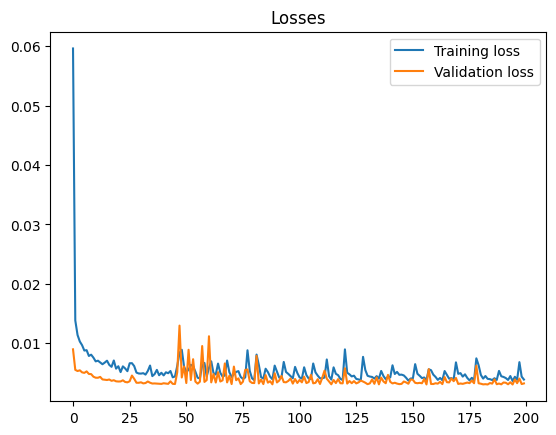

In [13]:
import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 20
learning_rate = 1e-3
weight_decay = 1e-7

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = RNNModel(**model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Опыт 1
opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)
# Опыт 2
model_params['hidden_dim'] = 128
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

# Опыт 3
model_params['layer_dim'] = 2
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

# Опыт 4
model_params['dropout_prob'] = 0.3
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

# Опыт 5
learning_rate = 5e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

# Опыт 6
loss_fn = nn.L1Loss()
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

# Опыт 7
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

# Опыт 8
n_epochs = 30
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

# Опыт 9
weight_decay = 1e-6
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)


## **Форматирование прогнозов**

In [14]:
def inverse_transform(scaler, df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """Get the real values of the forecasts."""
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions: list, values: list, df_test: pd.DataFrame, scaler) -> pd.DataFrame:
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
df_result

,value,prediction
Date,,
2020-09-06,21.000000,22.623035
2020-09-07,25.000002,22.649645
2020-09-08,27.000000,24.455526
2020-09-09,11.999999,26.471451
2020-09-10,17.000000,18.902737
...,...,...
2023-09-26,21.000000,25.386358
2023-09-27,19.000002,23.335638
2023-09-28,17.999998,20.844952


## **Визуализация прогнозов**

In [15]:
def get_temp_by_month(df: pd.DataFrame, start_date: str, end_date: str) -> pd.DataFrame:
    """Getting the temperature in the specified period"""
    df = df.reset_index(inplace=False)
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    return df[(start_date <= df["Date"]) & (df["Date"] <= end_date)]

get_temp_by_month(df_result, "2023-01-10", "2023-01-21")

,Date,value,prediction
836,2023-01-10,-23.000000,-17.802376
837,2023-01-11,-21.000000,-17.503786
838,2023-01-12,-15.000000,-16.823700
839,2023-01-13,-14.000000,-13.427436
840,2023-01-14,-12.000000,-12.178230
841,2023-01-15,-10.000001,-11.329354
842,2023-01-16,-12.000000,-9.904111
843,2023-01-17,-12.000000,-10.937943
844,2023-01-18,-10.000001,-11.406476
845,2023-01-19,-8.999999,-10.428966


## **Итоговый график**

<Axes: xlabel='Date'>

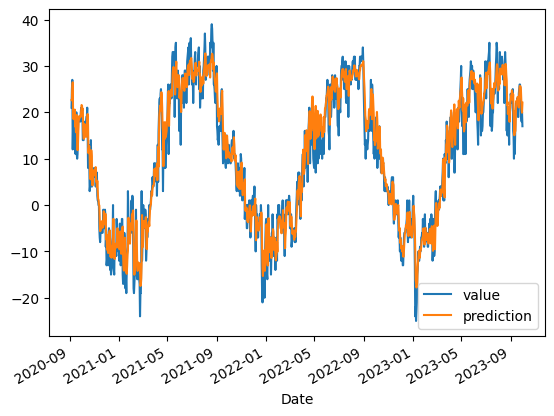

In [16]:
df_result.plot()